# XY-calibration
##  Field 1

In [1]:
cd ..

/Users/Vincent/Github/FireBallPipe


In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from astropy.io import fits
from astropy import wcs, coordinates
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib import pyplot as plt
from astropy.table import Table
import matplotlib.patches as patches
import unittest

sys.path.insert(1, './Calibration')
from guider2UV.guider2UV import Guider2UV, diff_skycoord, fit_model, plot_fit
from Calibration.mapping import Mapping

## initialization from last xy calib

In [3]:
# prerequisites:
previous_xy_mapping = 'Notebook/Files/Guider2UV_F1_nogamma.new.pkl'
mask_det_map_file = "Calibration/Mappings/2022/mapping-mask-det-w-2022-5-F1.pkl"
target_filename = 'Calibration/Targets/2022/targets_F1.txt'
mapping_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-82.fits"
new_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-106.fits"

In [4]:
G2UV = Guider2UV(filename=previous_xy_mapping)
F1 = Table.read(target_filename, format='ascii')
mask_det_map = Mapping(mask_det_map_file)

# print(G2UV)

FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39272815, 36.41856381)>): (lon, lat) in deg
    (0.17639951, 0.0154012)>
FOV center pixel position in guider [array(1338.56657245), array(600.7867847)]


## Alternative initialisation for new fields:

In [5]:
# prerequisites:
#previous_xy_mapping = 'Notebook/Files/Guider2UV_F1_nogamma.new.pkl'
mask_det_map_file = "Calibration/Mappings/2022/mapping-mask-det-w-2022-5-F1.pkl"
target_filename = 'Calibration/Targets/2022/targets_NEW.txt'
mapping_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-82.fits"
new_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-106.fits"

In [6]:
from astropy import units as u

Field_center=coordinates.SkyCoord(f_ra * u.deg, f_dec * u.deg)
# get FOVcenter & guider wcs from another field
G2UVother = Guider2UV(filename="put pkl from a functionning mapping from another field")
FOVcenter = G2UVother.FOV_center_guider_coord
guider_wcs = G2UVother.GuiderP.w
G2UV = Guider2UV(Field_center=Field_center,
                 Field_rotation= f_rot * u.deg,
                 Field_gamma=1.0,  # platescale correction (need to update the polynomial in the MaskAstrometry.py)
                 FOVcenter_guider_coord=FOVcenter,
                 guider_wcs = guider_wcs,
                 )
                 
FNEW = Table.read(target_filename, format='ascii')
mask_det_map = Mapping(mask_det_map_file)

# print(G2UV)

NameError: name 'f_ra' is not defined

## Diffuse UV image (step IV.1)

load new mapping

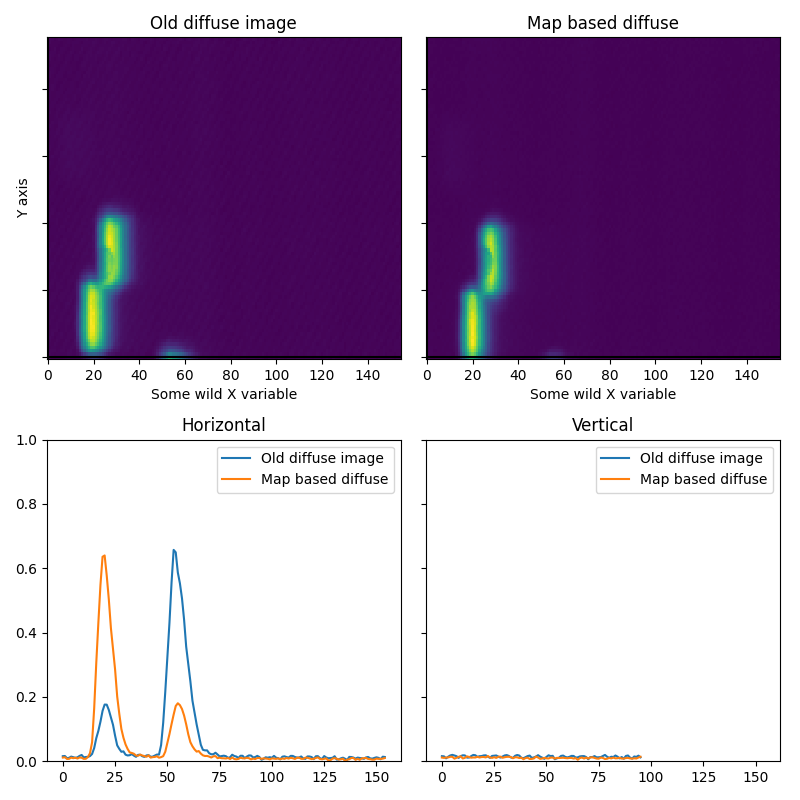

In [16]:
# mask_det_map_file = cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/Detector_Mask_mappings/mapping-mask-det-180612-F1.pkl'
# mask_det_map_file ="Calibration/Mappings/2022/mapping-mask-det-w-2022-5-F1.pkl"
# for ax, file in zip(axes,[mapping_diffuse_image,new_diffuse_image]])
data1 = fits.open(mapping_diffuse_image)[0].data[1404:1500,1925:2080]
data2 = fits.open(new_diffuse_image)[0].data[1404:1500,1925:2080]
data1 = (data1-data1.min()) / (data1-data1.min()).ptp()
data2 = (data2-data2.min()) / (data2-data2.min()).ptp()

from mpl_interactions import heatmap_slicer
fig, axes = heatmap_slicer(
    np.arange(data2.shape[1]),
    np.arange(data2.shape[0]),
    (data1, data2),
    slices="both",
    figsize = (8,8),
    heatmap_names=("Old diffuse image", "Map based diffuse"),
    labels=("Some wild X variable", "Y axis"),
    interaction_type="click")

plt.tight_layout()
plt.show()



In [8]:
offset = np.array([5., 10.])
G2UV.set_detector_mapping(mask_det_map, offsets = offset+1)


## Scan sequence (step IV.9)

GC - 46 - 51 - 14 - 8 - 12 - 16 - 38 - 44

In [9]:
slits = ['46', '51', '14', '8', '12', '16', '38', '44'] 

movs, slits_coord = G2UV.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

assert movs.sum(axis=0)[0] <0.1
assert movs.sum(axis=0)[1] <0.1



slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-5.1696728  3.934102 ]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-4.190085  -1.2881544]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [6.2134041 2.5275849]

targets local coords in siderostat local frame:
EL: 159.4 arcsec ; CE: 256.9 arcsec
EL: 369.0 arcsec ; CE: 329.0 arcsec
EL: 478.0 arcsec ; CE: -245.0 arcsec
EL: 277.5 arcsec ; CE: -394.8 arcsec
EL: 187.0 arcsec ; CE: -342.1 arcsec
EL: 257.3 arcsec ; CE: -199.1 arcsec
EL: 229.1 arcsec ; CE: 131.8 arcsec
EL: 430.1 arcsec ; CE: 227.8 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 159.4 arcsec ; CE 256.9 arcsec ; image: True
EL: 209.6 arcsec ; CE 72.0 arcsec ; image: True
EL: 109.0 arcsec ;

observed slits position :

In [8]:
slits_coord_obs_det = np.array([
       [1965.59756538,  420.22242579],
       [1631.74361865,  289.23423754],
       [1467.73408468, 1349.36778046],
       [1784.27150004, 1626.79774278],
       [1927.70920124, 1532.48181218],
       [1818.74748265, 1266.98195373],
       [1859.64545293,  654.1904897 ],
       [1539.18268865,  478.63015312],
#retour
       [1538.98978056,  473.42365165],
       [1859.70918054,  650.33623459],
       [1819.23982594, 1263.17030059],
       [1927.97229623, 1527.29654425],
       [1784.71779993, 1630.64211506],
       [1468.24324699, 1354.89013602],
       [1631.89394058,  287.11784832],
       [1966.20476903,  416.24326822]])

slits_coord_obs_det

array([[1965.59756538,  420.22242579],
       [1631.74361865,  289.23423754],
       [1467.73408468, 1349.36778046],
       [1784.27150004, 1626.79774278],
       [1927.70920124, 1532.48181218],
       [1818.74748265, 1266.98195373],
       [1859.64545293,  654.1904897 ],
       [1539.18268865,  478.63015312],
       [1538.98978056,  473.42365165],
       [1859.70918054,  650.33623459],
       [1819.23982594, 1263.17030059],
       [1927.97229623, 1527.29654425],
       [1784.71779993, 1630.64211506],
       [1468.24324699, 1354.89013602],
       [1631.89394058,  287.11784832],
       [1966.20476903,  416.24326822]])

In [9]:
slits_coord_obs_det.shape

(16, 2)

In [10]:
valid = np.isfinite(slits_coord_obs_det[:,0])
#valid = np.array([True]*8 + [False]*8)
try:
    obs_wave = G2UV.mask_det_map.w[0]
except TypeError:
    obs_wave = 0.2139

print("wave: ", obs_wave)

slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.2139


In [11]:
slits_coord_valid

[<SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.08891379, -0.14690964)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.20579385, -0.1881087)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.26655888, 0.14008058)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.15476134, 0.22577978)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.10425847, 0.1956433)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (l

### look at siderostat frame hysteresis 

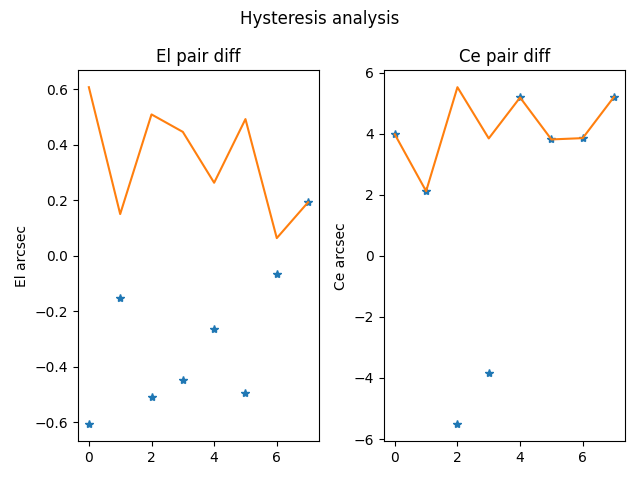

In [12]:
mid  = len(slits_coord_obs_det)//2
pair_diff = slits_coord_obs_det[:mid] - slits_coord_obs_det[::-1][:mid]
pair_diff
fig, (ax0,ax1) = plt.subplots(1,2)
# plt.subplot('120')
ax0.plot(pair_diff[:,0],'*')
ax0.plot(np.abs(pair_diff[:,0]),'-')
ax0.set_title("El pair diff")
ax0.set_ylabel("El arcsec")
# plt.subplot('121')
ax1.plot(pair_diff[:,1],'*')
ax1.plot(np.abs(pair_diff[:,1]),'-')
ax1.set_title("Ce pair diff")
ax1.set_ylabel("Ce arcsec")
fig.suptitle("Hysteresis analysis")
fig.tight_layout()


## Update model with observed slit positions (step IV.11)

In [13]:
slits_coord_obs = G2UV.detector2guider(slits_coord_obs_det, wave=obs_wave, angle=True  )


Fitting rotation, translation and magnification
gamma: 1.258066316339834
theta: 166.8832988583862 arcmin
dx: 197.82417971391723 arcsec
dy: 154.89852600699732 arcsec
variances: [4.11192686e-04 1.41357633e+00 3.51871332e-01 3.51871332e-01]

residuals in arcsec: [[ 516.89201727 -160.23257135]
 [-213.59688703 -180.79303354]
 [-651.95819032  123.44067605]
 [  27.80534282  186.66949974]
 [ 352.15534953  157.25479867]
 [ 130.67652104   87.23374442]
 [ 265.85267842  -87.76934922]
 [-429.31660624 -117.48867771]
 [-429.53461414 -123.41414961]
 [ 265.94676683  -92.04697415]
 [ 131.38820843   83.03418108]
 [ 352.64874649  151.52572284]
 [  28.25835183  190.92918498]
 [-651.43891288  129.45475691]
 [-213.44536199 -183.19427046]
 [ 517.66658995 -164.60353866]]
max residual in EL,CE 652.0, 190.9 arcsec
mean residual in EL,CE 376.7, 143.6 arcsec


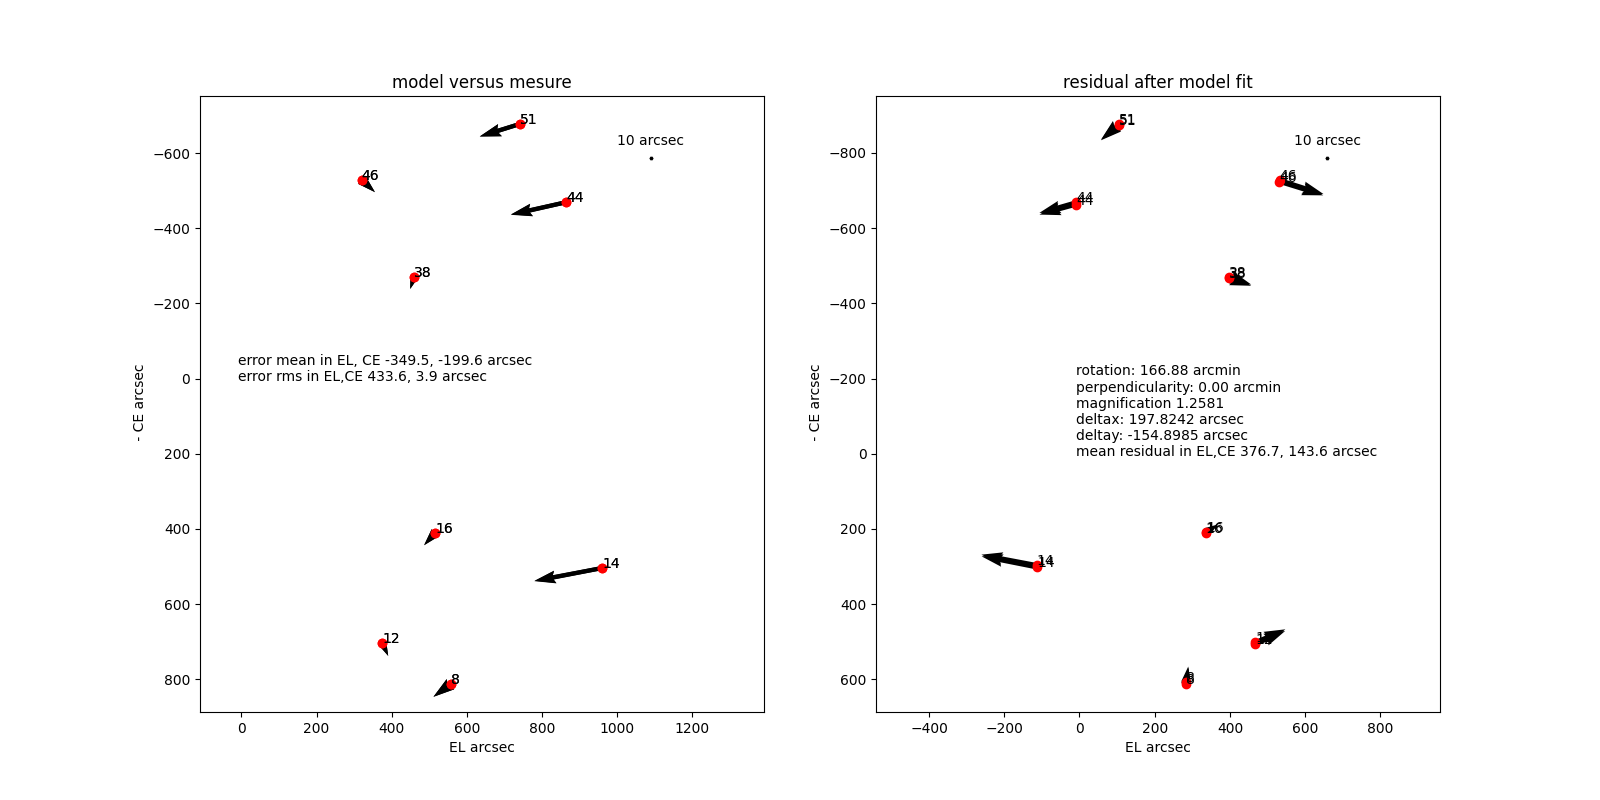

In [14]:
weight = np.array( [1.]*16  + [1./(1. + 1e-1)]*16)

G2UVcor, residuals = G2UV.update_model(slits_coord_valid, slits_coord_obs, labels=slits_valid, plot=True)

In [15]:
G2UVcor

(<guider2UV.guider2UV.Guider2UV at 0x7fe450b3deb0>,
 array([[ 0.14358112, -0.04450905],
        [-0.05933247, -0.05022029],
        [-0.1810995 ,  0.03428908],
        [ 0.00772371,  0.05185264],
        [ 0.09782093,  0.04368189],
        [ 0.03629903,  0.0242316 ],
        [ 0.07384797, -0.02438037],
        [-0.11925461, -0.03263574],
        [-0.11931517, -0.03428171],
        [ 0.0738741 , -0.0255686 ],
        [ 0.03649672,  0.02306505],
        [ 0.09795799,  0.04209048],
        [ 0.00784954,  0.05303588],
        [-0.18095525,  0.03595965],
        [-0.05929038, -0.0508873 ],
        [ 0.14379627, -0.04572321]]))

### save corrected model for future use (eg redo the clalib on same field)

In [16]:
#G2UVcor.save(filename=cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F1_180904.pkl')

## Check corrected model through science mask (step IV.14)

In [17]:
movs_new, slits_coord_new = G2UVcor.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-5.1696728  3.934102 ]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-4.190085  -1.2881544]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [6.2134041 2.5275849]

targets local coords in siderostat local frame:
EL: 315.3 arcsec ; CE: 242.8 arcsec
EL: 583.8 arcsec ; CE: 321.0 arcsec
EL: 685.1 arcsec ; CE: -408.4 arcsec
EL: 423.3 arcsec ; CE: -585.2 arcsec
EL: 312.5 arcsec ; CE: -513.4 arcsec
EL: 410.0 arcsec ; CE: -337.4 arcsec
EL: 395.3 arcsec ; CE: 81.1 arcsec
EL: 654.4 arcsec ; CE: 190.0 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 315.3 arcsec ; CE 242.8 arcsec ; image: True
EL: 268.5 arcsec ; CE 78.3 arcsec ; image: True
EL: 101.3 arcsec ; 

## Star sequence (step IV.16)

gc - s8 - s25 - s31

In [18]:
star_target_path = "Calibration/Targets/2022/GuidingStars/F1_guidingstars.fits"

F1_stars = Table.read(star_target_path, format='fits')

stars = [8, 25, 31]

star_movs, stars_coord = G2UVcor.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.1014, -5.786504)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.221491, -5.776507)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.254526, -5.815258)]>

targets local coords in siderostat local frame:
EL: 307.0 arcsec ; CE: -265.7 arcsec
EL: 340.5 arcsec ; CE: -58.0 arcsec
EL: 275.3 arcsec ; CE: 4.4 arcsec

siderostat moves sequence: 
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 307.0 arcsec ; CE -265.7 arcsec ; image: True
EL: 33.6 arcsec ; CE 207.7 arcsec ; image: True
EL: -65.2 arcsec ; CE 62.4 arcsec ; image: True
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 65.2 arcsec ; CE -62.4 arcsec ; image: True
EL: -33.6 arcsec ; CE -237.7 arcsec ; image: False
EL: 0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -307.0 arcsec ; CE 265.7 arcsec ; image: True


In [19]:
stars_coord

[<SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.17118275, 0.15192652)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.18990415, 0.03317681)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.15354835, -0.00251388)]>]

------------------------------------------------------

below stuf is not in the XY calib procedure, we should remove it

Re-compute model (thermal drift) ?

In [20]:
slits_coord_obs_det2 = np.array([
       [1967.77672211,  420.883372  ],
       [1634.94667484,  284.99941421],
       [1460.30889342, 1343.63228178],
       [1774.05043782, 1625.66456504],
       [1918.36655798, 1531.24794446],
       [1811.96613007, 1264.73988401],
       [1858.73062442,  652.77625595],
       [1539.37281284,  472.87952084],
#retour
       [1538.92830776,  467.65309777],
       [1858.32109489,  647.99384259],
       [1811.64481037, 1260.92668703],
       [1917.94530091, 1526.91879826],
       [1773.67417428, 1628.30043431],
       [1459.76904708, 1347.27853125],
       [1634.04334215,  281.33418915],
       [1966.71028008,  414.34595604]])
    
slits_coord_obs_det2

array([[1967.77672211,  420.883372  ],
       [1634.94667484,  284.99941421],
       [1460.30889342, 1343.63228178],
       [1774.05043782, 1625.66456504],
       [1918.36655798, 1531.24794446],
       [1811.96613007, 1264.73988401],
       [1858.73062442,  652.77625595],
       [1539.37281284,  472.87952084],
       [1538.92830776,  467.65309777],
       [1858.32109489,  647.99384259],
       [1811.64481037, 1260.92668703],
       [1917.94530091, 1526.91879826],
       [1773.67417428, 1628.30043431],
       [1459.76904708, 1347.27853125],
       [1634.04334215,  281.33418915],
       [1966.71028008,  414.34595604]])

In [21]:
valid = np.isfinite(slits_coord_obs_det2[:,0])
#valid = np.array([True]*8 + [False]*8)
try:
    obs_wave = G2UV.mask_det_map.w[0]
except TypeError:
    obs_wave = 0.2139
print("wave: ", obs_wave)

#slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
#slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.2139


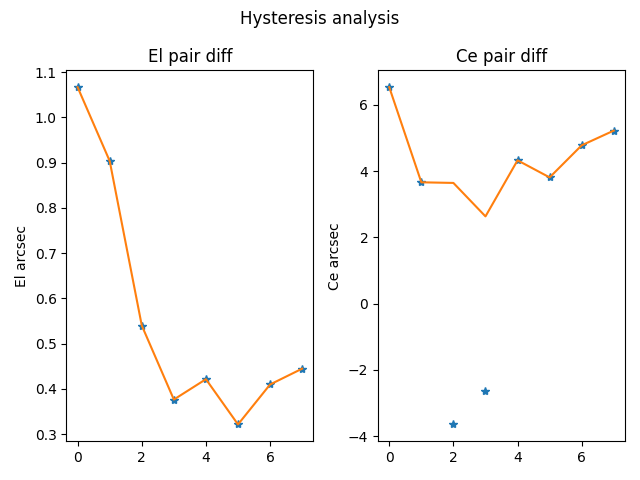

In [22]:
mid  = len(slits_coord_obs_det2)//2
pair_diff2 = slits_coord_obs_det2[:mid] - slits_coord_obs_det2[::-1][:mid]
pair_diff2

fig, (ax0,ax1) = plt.subplots(1,2)
# plt.subplot('120')
ax0.plot(pair_diff2[:,0],'*')
ax0.plot(np.abs(pair_diff2[:,0]),'-')
ax0.set_title("El pair diff")
ax0.set_ylabel("El arcsec")
# plt.subplot('121')
ax1.plot(pair_diff2[:,1],'*')
ax1.plot(np.abs(pair_diff2[:,1]),'-')
ax1.set_title("Ce pair diff")
ax1.set_ylabel("Ce arcsec")
fig.suptitle("Hysteresis analysis")
fig.tight_layout()



In [23]:
valid2 = np.array([True]*16)
valid2[[0,1,-1,-2]] = False
slits2 = np.array(slits_valid)[valid2]
print(slits2)

['14' '8' '12' '16' '38' '44' '44' '38' '16' '12' '8' '14']


In [24]:
slits_coord_obs2 = G2UV.detector2guider(slits_coord_obs_det2[valid2], wave=obs_wave, angle=True  )
slits_coord_valid2 = [slits_coord[i] for i in np.nonzero(valid2)[0]]
slits_valid2 = np.array(slits + slits[::-1])[valid2]

Fitting rotation, translation and magnification
gamma: 1.3301603320758102
theta: 640.3197337032739 arcmin
dx: 250.09923399416846 arcsec
dy: -4.846091245912673 arcsec
variances: [5.47067103e-04 1.88067817e+00 4.72118882e-01 4.72118882e-01]

residuals in arcsec: [[-609.36839008  125.90179945]
 [  -4.5664089   160.73963296]
 [ 322.69592741   98.44842192]
 [ 155.21417727   25.57995984]
 [ 387.51578901 -205.30045476]
 [-249.9461391  -198.66020584]
 [-250.48102445 -204.62302042]
 [ 387.01454947 -210.6115385 ]
 [ 154.89473731   21.36565365]
 [ 322.29525435   93.65439413]
 [  -5.11631224  163.64294836]
 [-610.15216004  129.86240921]]
max residual in EL,CE 610.2, 210.6 arcsec
mean residual in EL,CE 344.6, 150.8 arcsec


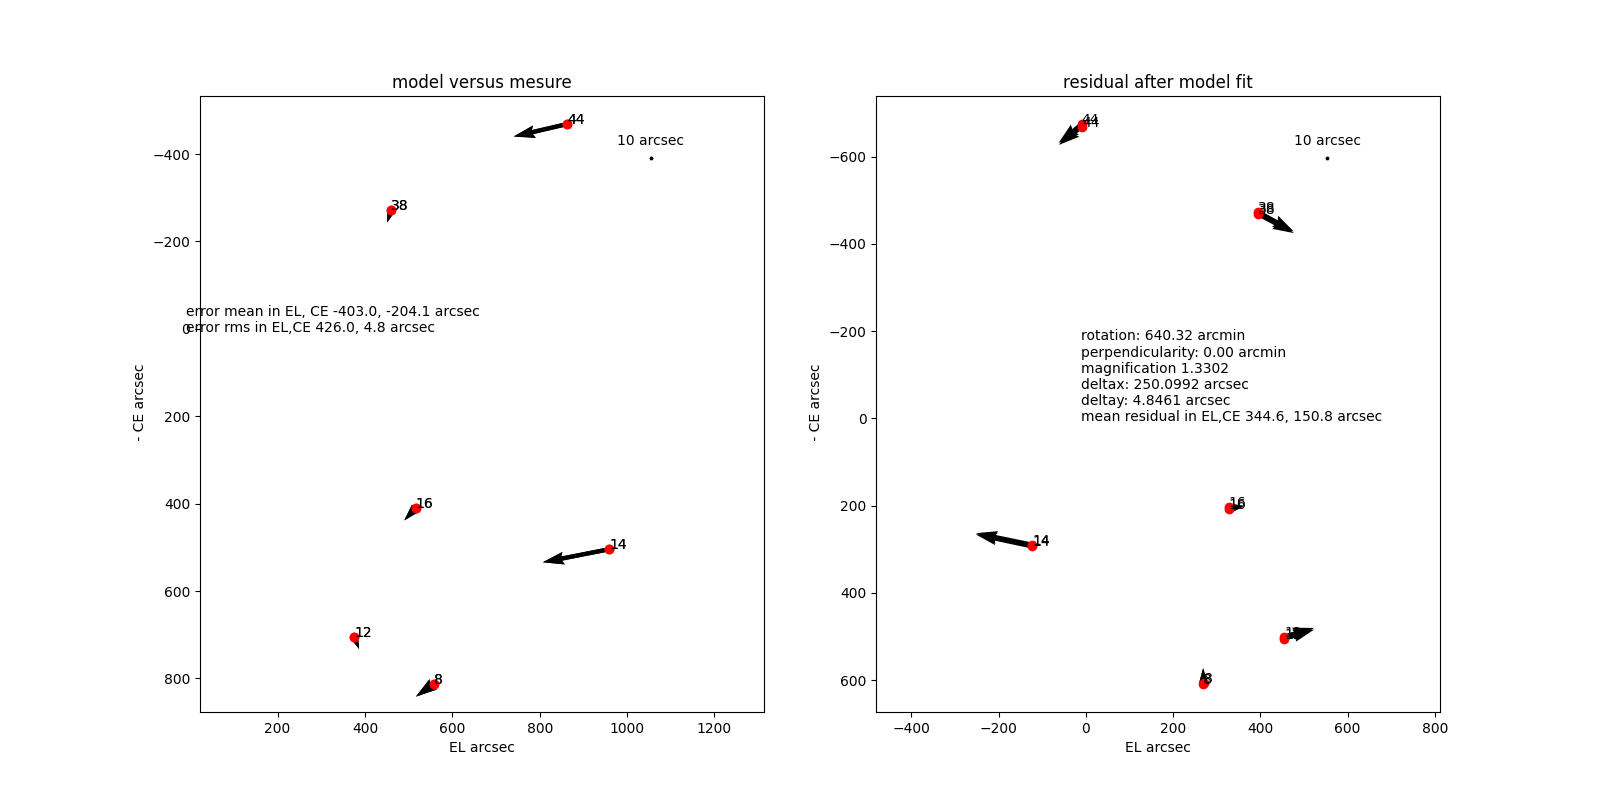

In [25]:
weight = np.array( [1.]*14  + [1./(1. + 1e-1)]*14)

G2UVcor2 = G2UV.update_model(slits_coord_valid2, slits_coord_obs2, labels=slits_valid2, plot=True)

In [26]:
G2UVcor2 = G2UVcor2[0]
star_movs2, stars_coord2 = G2UVcor2.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.1014, -5.786504)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.221491, -5.776507)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.254526, -5.815258)]>

targets local coords in siderostat local frame:
EL: 330.2 arcsec ; CE: -208.8 arcsec
EL: 393.3 arcsec ; CE: -3.5 arcsec
EL: 336.2 arcsec ; CE: 68.2 arcsec

siderostat moves sequence: 
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 330.2 arcsec ; CE -208.8 arcsec ; image: True
EL: 63.1 arcsec ; CE 205.3 arcsec ; image: True
EL: -57.1 arcsec ; CE 71.7 arcsec ; image: True
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 57.1 arcsec ; CE -71.7 arcsec ; image: True
EL: -63.1 arcsec ; CE -235.3 arcsec ; image: False
EL: 0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -330.2 arcsec ; CE 208.8 arcsec ; image: True


In [27]:
movs_new2, slits_coord_new2 = G2UVcor2.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-5.1696728  3.934102 ]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-4.190085  -1.2881544]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [6.2134041 2.5275849]

targets local coords in siderostat local frame:
EL: 402.6 arcsec ; CE: 326.2 arcsec
EL: 701.0 arcsec ; CE: 371.9 arcsec
EL: 700.9 arcsec ; CE: -421.3 arcsec
EL: 394.9 arcsec ; CE: -573.2 arcsec
EL: 287.3 arcsec ; CE: -480.9 arcsec
EL: 417.6 arcsec ; CE: -306.7 arcsec
EL: 464.0 arcsec ; CE: 142.3 arcsec
EL: 756.9 arcsec ; CE: 222.0 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 402.6 arcsec ; CE 326.2 arcsec ; image: True
EL: 298.3 arcsec ; CE 45.7 arcsec ; image: True
EL: -0.1 arcsec ; 